In [5]:
class Node:
    def _init_(self,state,parent,action):
        self.state=state
        self.parent=parent
        self.action=action

class StackFrontier:
    def _init_(self):
        self.frontier=[]
    def add(self,node):
        self.frontier.append(node)
    def contains_state(self,state):
        return any(node.state==state for node in self.frontier)
    def empty(self):
        return len(self.frontier)==0
    def remove(self):
        if self.empty():
            raise Exception("empty frontier")
        node=self.frontier[-1]
        self.frontier=self.frontier[:-1]
        return node

class QueueFrontier(StackFrontier):
    def remove(self):
        if self.empty():
            raise Exception("empty frontier")
        node=self.frontier[0]
        self.frontier=self.frontier[1:]
        return node

class Maze:
    def _init_(self,filename):
        with open(filename) as f:
            contents=f.read()
        if contents.count("A")!=1:
            raise Exception("maze must have exactly one start point")
        if contents.count("B")!=1:
            raise Exception("maze must have exactly one goal")
        contents=contents.splitlines()
        self.height=len(contents)
        self.width=max(len(line) for line in contents)
        self.walls=[]
        for i in range(self.height):
            row=[]
            for j in range(self.width):
                try:
                    if contents[i][j]=="A":
                        self.start=(i,j)
                        row.append(False)
                    elif contents[i][j]=="B":
                        self.goal=(i,j)
                        row.append(False)
                    elif contents[i][j]==" ":
                        row.append(False)
                    else:
                        row.append(True)
                except IndexError:
                    row.append(False)
            self.walls.append(row)
        self.solution=None

    def print(self):
        solution=self.solution[1] if self.solution is not None else None
        print()
        for i,row in enumerate(self.walls):
            for j,col in enumerate(row):
                if col:
                    print("█", end="")
                elif (i,j)==self.start:
                    print("A", end="")
                elif (i,j)==self.goal:
                    print("B", end="")
                elif solution is not None and (i,j) in solution:
                    print("*", end="")
                else:
                    print(" ", end="")
            print()
        print()

    def neighbors(self,state):
        row,col=state
        candidates=[("up",(row-1,col)),("down",(row+1,col)),("left",(row,col-1)),("right",(row,col+1))]
        result=[]
        for action,(r,c) in candidates:
            if 0<=r<self.height and 0<=c<self.width and not self.walls[r][c]:
                result.append((action,(r,c)))
        return result

    def solve(self,method="dfs"):
        self.num_explored=0
        start=Node(state=self.start,parent=None,action=None)
        if method.lower()=="bfs":
            frontier=QueueFrontier()
        else:
            frontier=StackFrontier()
        frontier.add(start)
        self.explored=set()
        while True:
            if frontier.empty():
                raise Exception("no solution")
            node=frontier.remove()
            self.num_explored+=1
            if node.state==self.goal:
                actions=[]
                cells=[]
                while node.parent is not None:
                    actions.append(node.action)
                    cells.append(node.state)
                    node=node.parent
                actions.reverse()
                cells.reverse()
                self.solution=(actions,cells)
                return
            self.explored.add(node.state)
            for action,state in self.neighbors(node.state):
                if not frontier.contains_state(state) and state not in self.explored:
                    child=Node(state=state,parent=node,action=action)
                    frontier.add(child)

    def output_image(self,filename,show_solution=True,show_explored=False,cell_size=50,cell_border=2):
        from PIL import Image,ImageDraw
        img=Image.new("RGBA",(self.width*cell_size,self.height*cell_size),"black")
        draw=ImageDraw.Draw(img)
        solution=self.solution[1] if self.solution is not None else None
        for i,row in enumerate(self.walls):
            for j,col in enumerate(row):
                if col:
                    fill=(40,40,40)
                elif (i,j)==self.start:
                    fill=(255,0,0)
                elif (i,j)==self.goal:
                    fill=(0,171,28)
                elif solution is not None and show_solution and (i,j) in solution:
                    fill=(220,235,113)
                elif solution is not None and show_explored and (i,j) in self.explored:
                    fill=(212,97,85)
                else:
                    fill=(237,240,252)
                draw.rectangle([(j*cell_size+cell_border,i*cell_size+cell_border),((j+1)*cell_size-cell_border,(i+1)*cell_size-cell_border)],fill=fill)
        img.save(filename)

Created sample file: maze1.txt
Maze (input):

███████████
█A    █   █
█ ██ ███ ██
█    █    █
████ ██ █B█
█         █
███████████

Solving (BFS)...
States explored: 26
Solution (console):

███████████
█A    █   █
█*██ ███ ██
█****█    █
████*██ █B█
█   ******█
███████████



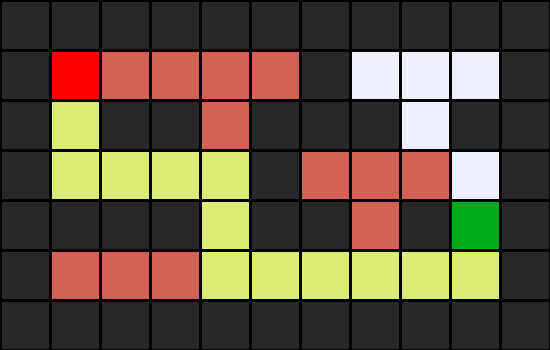

In [9]:
sample = """###########
#A    #   #
# ## ### ##
#    #    #
#### ## #B#
#         #
###########"""
open("maze1.txt","w").write(sample)
print("Created sample file: maze1.txt")
from IPython.display import Image, display

m = Maze("maze1.txt")        # load the maze file
print("Maze (input):")
m.print()

print("Solving (BFS)...")
m.solve(method="bfs")       # use "bfs" or "dfs"

print("States explored:", m.num_explored)
print("Solution (console):")
m.print()

out = "maze.png"
m.output_image(out, show_explored=True)
display(Image(out))

In [7]:
class Node:
    def __init__(self, state, parent, action):
        self.state = state
        self.parent = parent
        self.action = action


class StackFrontier:
    def __init__(self):
        self.frontier = []

    def add(self, node):
        self.frontier.append(node)

    def contains_state(self, state):
        return any(node.state == state for node in self.frontier)

    def empty(self):
        return len(self.frontier) == 0

    def remove(self):
        if self.empty():
            raise Exception("empty frontier")
        node = self.frontier[-1]
        self.frontier = self.frontier[:-1]
        return node


class QueueFrontier(StackFrontier):
    def remove(self):
        if self.empty():
            raise Exception("empty frontier")
        node = self.frontier[0]
        self.frontier = self.frontier[1:]
        return node


class Maze:
    def __init__(self, filename):
        with open(filename) as f:
            contents = f.read()

        if contents.count("A") != 1:
            raise Exception("maze must have exactly one start point")
        if contents.count("B") != 1:
            raise Exception("maze must have exactly one goal")

        contents = contents.splitlines()
        self.height = len(contents)
        self.width = max(len(line) for line in contents)

        self.walls = []
        for i in range(self.height):
            row = []
            for j in range(self.width):
                try:
                    if contents[i][j] == "A":
                        self.start = (i, j)
                        row.append(False)
                    elif contents[i][j] == "B":
                        self.goal = (i, j)
                        row.append(False)
                    elif contents[i][j] == " ":
                        row.append(False)
                    else:
                        row.append(True)
                except IndexError:
                    row.append(False)
            self.walls.append(row)

        self.solution = None

    def print(self):
        solution = self.solution[1] if self.solution is not None else None
        print()
        for i, row in enumerate(self.walls):
            for j, col in enumerate(row):
                if col:
                    print("█", end="")
                elif (i, j) == self.start:
                    print("A", end="")
                elif (i, j) == self.goal:
                    print("B", end="")
                elif solution is not None and (i, j) in solution:
                    print("*", end="")
                else:
                    print(" ", end="")
            print()
        print()

    def neighbors(self, state):
        row, col = state
        candidates = [("up", (row - 1, col)), ("down", (row + 1, col)),
                      ("left", (row, col - 1)), ("right", (row, col + 1))]
        result = []
        for action, (r, c) in candidates:
            if 0 <= r < self.height and 0 <= c < self.width and not self.walls[r][c]:
                result.append((action, (r, c)))
        return result

    def solve(self, method="dfs"):
        self.num_explored = 0

        start = Node(state=self.start, parent=None, action=None)

        if method.lower() == "bfs":
            frontier = QueueFrontier()
        else:
            frontier = StackFrontier()

        frontier.add(start)
        self.explored = set()

        while True:
            if frontier.empty():
                raise Exception("no solution")

            node = frontier.remove()
            self.num_explored += 1

            if node.state == self.goal:
                actions = []
                cells = []

                while node.parent is not None:
                    actions.append(node.action)
                    cells.append(node.state)
                    node = node.parent
                actions.reverse()
                cells.reverse()
                self.solution = (actions, cells)
                return

            self.explored.add(node.state)

            for action, state in self.neighbors(node.state):
                if not frontier.contains_state(state) and state not in self.explored:
                    child = Node(state=state, parent=node, action=action)
                    frontier.add(child)

    def output_image(self, filename, show_solution=True, show_explored=False, cell_size=50, cell_border=2):
        from PIL import Image, ImageDraw

        img = Image.new("RGBA", (self.width * cell_size, self.height * cell_size), "black")
        draw = ImageDraw.Draw(img)

        solution = self.solution[1] if self.solution is not None else None

        for i, row in enumerate(self.walls):
            for j, col in enumerate(row):
                if col:
                    fill = (40, 40, 40)
                elif (i, j) == self.start:
                    fill = (255, 0, 0)
                elif (i, j) == self.goal:
                    fill = (0, 171, 28)
                elif solution is not None and show_solution and (i, j) in solution:
                    fill = (220, 235, 113)
                elif solution is not None and show_explored and (i, j) in self.explored:
                    fill = (212, 97, 85)
                else:
                    fill = (237, 240, 252)

                draw.rectangle(
                    [
                        (j * cell_size + cell_border, i * cell_size + cell_border),
                        ((j + 1) * cell_size - cell_border, (i + 1) * cell_size - cell_border)
                    ],
                    fill=fill
                )

        img.save(filename)


Created sample file: maze1.txt
Maze (input):

███████████
█A    █   █
█ ██ ███ ██
█    █    █
████ ██ █B█
█         █
███████████

Solving (BFS)...
States explored: 26
Solution (console):

███████████
█A    █   █
█*██ ███ ██
█****█    █
████*██ █B█
█   ******█
███████████



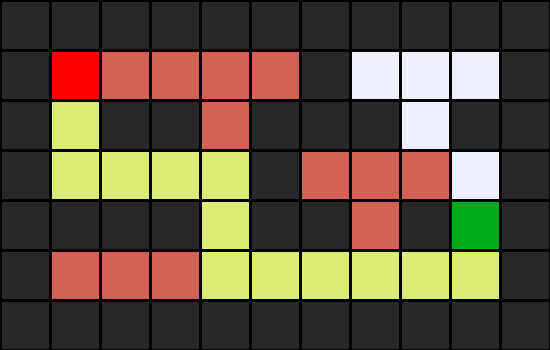

In [8]:
# Create sample maze file
sample = """###########
#A    #   #
# ## ### ##
#    #    #
#### ## #B#
#         #
###########"""

with open("maze1.txt", "w") as f:
    f.write(sample)

print("Created sample file: maze1.txt")

# Run the Maze solver
from IPython.display import Image, display

m = Maze("maze1.txt")  # Load the maze file
print("Maze (input):")
m.print()

print("Solving (BFS)...")
m.solve(method="bfs")  # use "bfs" or "dfs"

print("States explored:", m.num_explored)
print("Solution (console):")
m.print()

out = "maze.png"
m.output_image(out, show_explored=True)
display(Image(out))
